In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import re


## Read data

In [2]:
data = pd.read_csv('full_data_clustered_ssim.csv')
data = data.replace(np.nan,'None')
data = data.drop(columns=['cluster','cluster_2'])

In [3]:
data.columns

Index(['CVE ID', 'Publish Date', 'Update Date',
       'Number Of Related Vulnerabilities', 'index', 'CWE ID',
       'Vulnerability Type(s)', 'Score', 'Access', 'Complexity',
       'Authentication', 'Conf.', 'Integ.', 'Avail', 'CVE Summary',
       'Vulnerability Name', 'Vulnerability Description', 'CLEAN TEXT',
       'CI SCORE'],
      dtype='object')

## OHE

In [4]:
labelencd_cols = ['Vulnerability Type(s)','Vulnerability Name','Access','Complexity','Authentication','Conf.','Integ.','Avail']

ohe = pd.concat([
    pd.get_dummies(data[labelencd_cols], dtype=int), 
    data['Score'],
    data['Number Of Related Vulnerabilities']
], axis=1)

ohe

,Vulnerability Type(s)_+Info,Vulnerability Type(s)_+Info CSRF,Vulnerability Type(s)_+Info File Inclusion,Vulnerability Type(s)_+Priv,Vulnerability Type(s)_+Priv +Info,Vulnerability Type(s)_+Priv Bypass,Vulnerability Type(s)_+Priv Bypass +Info,Vulnerability Type(s)_+Priv CSRF,Vulnerability Type(s)_+Priv Dir. Trav.,Vulnerability Type(s)_+Priv Mem. Corr.,...,Integ._Complete,Integ._None,Integ._Partial,Integ._Unknown,Avail_Complete,Avail_None,Avail_Partial,Avail_Unknown,Score,Number Of Related Vulnerabilities
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,4.3,22413.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,7.5,3011.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,5.8,754.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,5.0,9380.0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,2.1,394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61693,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,4.3,22413.0
61694,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,5.0,1320.0
61695,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,5.8,754.0
61696,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,4.3,22413.0


# Latent Dirichlet Allocation - LDA

In [10]:
# from sklearn.decomposition import LatentDirichletAllocation as LDA

# dtm = ohe
# n_topics = 2
# lda = LatentDirichletAllocation(n_components=n_topics)
# lda_topics = lda.fit_transform(dtm)
# lda_topics # +20 min

In [11]:
# len(lda_topics) , len(lda.components_)

In [12]:
# for i,topic in enumerate(lda.components_):
#     print(i,':',len(topic),topic)

# DBSCAN

In [13]:
from sklearn.cluster import DBSCAN

# dbscan = DBSCAN()
# dbscan_clusters = dbscan.fit_predict(ohe)
# dbscan_clusters

In [30]:
# num_clusters = len(np.unique(dbscan_clusters)) - 1
# num_clusters 1462

1462

# Agglomerative Clustering

In [16]:
# from sklearn.cluster import AgglomerativeClustering

# n_clusters = 2

# hc = AgglomerativeClustering(n_clusters=n_clusters)
# hc_clusters = hc.fit_predict(ohe)
# hc_clusters

# KMedoids 

In [10]:
# !pip install scikit-learn-extra

In [18]:
# from sklearn_extra.cluster import KMedoids
# from sklearn.preprocessing import StandardScaler
# from scipy.sparse import csr_matrix

# scaler = StandardScaler()
# ohe_scaled = scaler.fit_transform(ohe)
# sparse_matrix = csr_matrix(ohe_scaled)

# k = 2
# kmedoids = KMedoids(n_clusters=k)
# kmedoids_clusters = kmedoids.fit_predict(ohe)
# kmedoids_clusters

# KModes

In [12]:
# !pip install kmodes

In [19]:
from kmodes.kmodes import KModes

n_clusters = 2
km = KModes(n_clusters=n_clusters,max_iter=200)
clusters = km.fit_predict(ohe)

print(clusters)


[0 0 0 ... 0 0 0]


In [20]:
np.unique(clusters)

array([0, 1], dtype=uint16)

In [21]:
len(clusters)

61698

In [22]:
cluster_map = pd.DataFrame()
# cluster_map['data_index'] = ohe.index.values
cluster_map['index_clustermap'] = range(1,len(ohe)+1)
cluster_map['Kmodes_clusters'] = clusters
cluster_map

,index_clustermap,Kmodes_clusters
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
61693,61694,0
61694,61695,0
61695,61696,0
61696,61697,0


In [23]:
cols = ['index','Vulnerability Type(s)','Vulnerability Name','Access','Complexity','Authentication','Conf.','Integ.','Avail'
       ,'Score','Number Of Related Vulnerabilities']

clustered_data = pd.concat([data[cols] , cluster_map['Kmodes_clusters']] , axis=1)
clustered_data

,index,Vulnerability Type(s),Vulnerability Name,Access,Complexity,Authentication,Conf.,Integ.,Avail,Score,Number Of Related Vulnerabilities,Kmodes_clusters
0,1,XSS,Failure to Preserve Web Page Structure ('Cross...,Remote,Medium,Not required,None,Partial,None,4.3,22413.0,0
1,2,Unknown,Improper Authentication,Remote,Low,Not required,Partial,Partial,Partial,7.5,3011.0,0
2,3,Unknown,URL Redirection to Untrusted Site ('Open Redir...,Remote,Medium,Not required,Partial,Partial,None,5.8,754.0,0
3,4,Unknown,Improper Input Validation,Remote,Low,Not required,None,Partial,None,5.0,9380.0,0
4,5,Unknown,Double Free,Local,Low,Not required,Partial,None,None,2.1,394.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61693,61694,XSS,Failure to Preserve Web Page Structure ('Cross...,Remote,Medium,Not required,None,Partial,None,4.3,22413.0,0
61694,61695,DoS,Uncontrolled Resource Consumption ('Resource E...,Remote,Low,Not required,None,None,Partial,5.0,1320.0,0
61695,61696,Unknown,URL Redirection to Untrusted Site ('Open Redir...,Remote,Medium,Not required,Partial,Partial,None,5.8,754.0,0
61696,61697,XSS,Failure to Preserve Web Page Structure ('Cross...,Remote,Medium,Not required,None,Partial,None,4.3,22413.0,0


In [24]:
cluster_map['Kmodes_clusters'].value_counts()

Kmodes_clusters
0    52630
1     9068
Name: count, dtype: int64

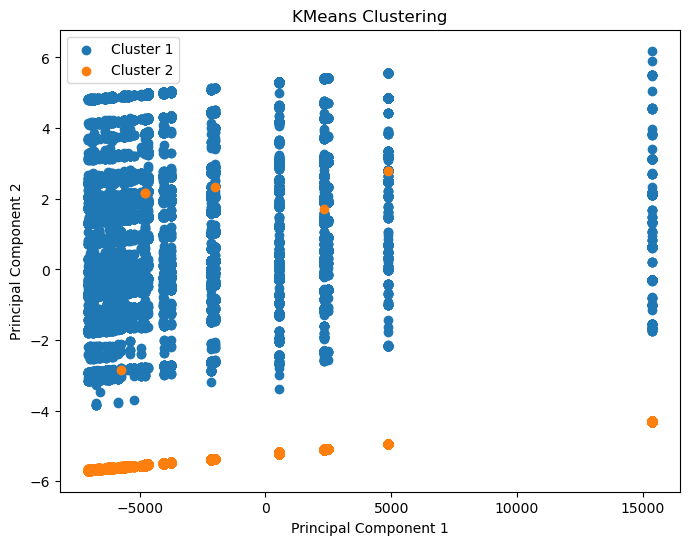

In [26]:
from sklearn.decomposition import PCA

n_clusters = 2

# Applying PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(ohe)

# Plotting the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(reduced_data[clusters == i, 0], reduced_data[clusters == i, 1], label=f'Cluster {i+1}')

plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


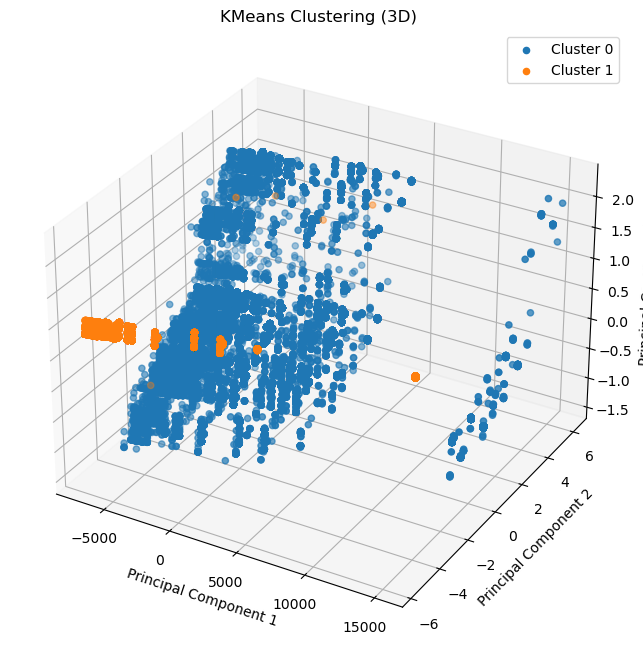

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

n_clusters = 2

# Applying PCA to reduce data to 3 dimensions
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(ohe)

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    ax.scatter(reduced_data[clusters == i, 0], reduced_data[clusters == i, 1], 
               reduced_data[clusters == i, 2], label=f'Cluster {i}')

ax.set_title('KMeans Clustering (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


## Metrics

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


# Calculate the silhouette score (ranges from -1 to 1, higher is better)
silhouette_avg = silhouette_score(ohe, clusters)
print("Silhouette Score:", silhouette_avg)

# Calculate the Davies-Bouldin index (lower is better)
davies_bouldin_avg = davies_bouldin_score(ohe, clusters)
print("Davies-Bouldin Index:", davies_bouldin_avg)

# Calculate the Calinski ()
calinski_harabasz_score_avg = calinski_harabasz_score(ohe, clusters)
print("Calinski Score:", calinski_harabasz_score_avg)



Silhouette Score: -0.003090444872620066
Davies-Bouldin Index: 122.27532328904756
Calinski Score: 1.2941268901374474


In [75]:
df = pd.concat([clustered_data,data['CI SCORE']],axis=1)

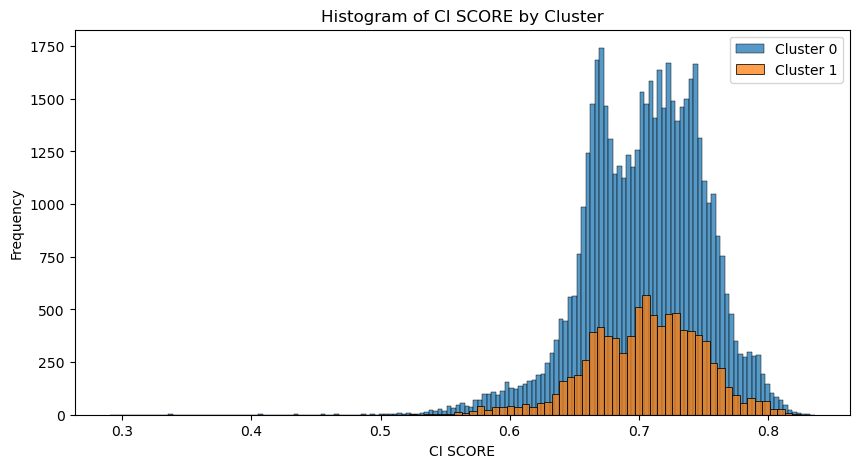

In [76]:
# Distribution for each cluster
cluster_0 = df[df['Kmodes_clusters']==0]
cluster_0_scores = cluster_0['CI SCORE']
cluster_1 = df[df['Kmodes_clusters']==1]
cluster_1_scores = cluster_1['CI SCORE']

plt.figure(figsize=(10,5))
sn.histplot(cluster_0_scores,label='Cluster 0')
sn.histplot(cluster_1_scores,label='Cluster 1')

plt.title('Histogram of CI SCORE by Cluster')
plt.xlabel('CI SCORE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# K-Prototypes 

In [25]:
from kmodes.kprototypes import KPrototypes

# Load your mixed data
data = pd.read_csv('mixed_data.csv')

# Select categorical and numerical columns
categorical_columns = ['categorical_feature_1', 'categorical_feature_2']
numerical_columns = ['numerical_feature_1', 'numerical_feature_2']

# Initialize KPrototypes with the desired number of clusters
n_clusters = 3
kp = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=2)

# Fit the model
clusters = kp.fit_predict(data[numerical_columns], categorical=data[categorical_columns])

# Add the cluster labels back to your data
data['cluster'] = clusters

# Print cluster centroids
print(kp.cluster_centroids_)

# Print cluster assignment for each instance
print(clusters)


# Mini Batch KMeans

In [110]:
from sklearn.cluster import MiniBatchKMeans

# Perform Mini-Batch K-Means clustering
num_clusters = 2
batch_size = 10000  # Number of samples per batch
mbkm = MiniBatchKMeans(n_clusters=num_clusters, batch_size=batch_size)
mbkm_clusters = mbkm.fit_predict(ohe)

# Get the cluster assignments for each data point
labels = mbkm.labels_
print("Cluster assignments:", labels)
print(mbkm_clusters)

# # Get the cluster centers
# cluster_centers = mbkm.cluster_centers_
# print("Cluster centers:", cluster_centers)


C:\Users\pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster assignments: [1 0 0 ... 0 1 0]
[1 0 0 ... 0 1 0]


In [111]:
cluster_map = pd.DataFrame()
# cluster_map['data_index'] = ohe.index.values
cluster_map['index_clustermap'] = range(1,len(ohe)+1)
cluster_map['mbKm_clusters'] = mbkm_clusters
cluster_map

,index_clustermap,mbKm_clusters
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
61693,61694,1
61694,61695,0
61695,61696,0
61696,61697,1


In [113]:
cols = ['index','Vulnerability Type(s)','Vulnerability Name','Access','Complexity','Authentication','Conf.','Integ.','Avail'
       ,'Score','Number Of Related Vulnerabilities']

clustered_data = pd.concat([data[cols] , cluster_map['mbKm_clusters']] , axis=1)
clustered_data

,index,Vulnerability Type(s),Vulnerability Name,Access,Complexity,Authentication,Conf.,Integ.,Avail,Score,Number Of Related Vulnerabilities,mbKm_clusters
0,1,XSS,Failure to Preserve Web Page Structure ('Cross...,Remote,Medium,Not required,None,Partial,None,4.3,22413.0,1
1,2,Unknown,Improper Authentication,Remote,Low,Not required,Partial,Partial,Partial,7.5,3011.0,0
2,3,Unknown,URL Redirection to Untrusted Site ('Open Redir...,Remote,Medium,Not required,Partial,Partial,None,5.8,754.0,0
3,4,Unknown,Improper Input Validation,Remote,Low,Not required,None,Partial,None,5.0,9380.0,0
4,5,Unknown,Double Free,Local,Low,Not required,Partial,None,None,2.1,394.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61693,61694,XSS,Failure to Preserve Web Page Structure ('Cross...,Remote,Medium,Not required,None,Partial,None,4.3,22413.0,1
61694,61695,DoS,Uncontrolled Resource Consumption ('Resource E...,Remote,Low,Not required,None,None,Partial,5.0,1320.0,0
61695,61696,Unknown,URL Redirection to Untrusted Site ('Open Redir...,Remote,Medium,Not required,Partial,Partial,None,5.8,754.0,0
61696,61697,XSS,Failure to Preserve Web Page Structure ('Cross...,Remote,Medium,Not required,None,Partial,None,4.3,22413.0,1


In [114]:
cluster_map['mbKm_clusters'].value_counts()

mbKm_clusters
0    51386
1    10312
Name: count, dtype: int64

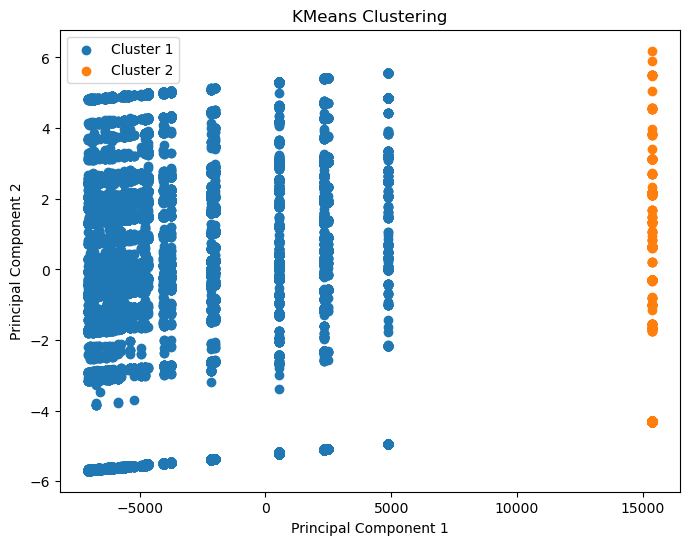

In [115]:
from sklearn.decomposition import PCA

n_clusters = 2

# Applying PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(ohe)

# Plotting the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(reduced_data[mbkm_clusters == i, 0], reduced_data[mbkm_clusters == i, 1], label=f'Cluster {i+1}')

plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


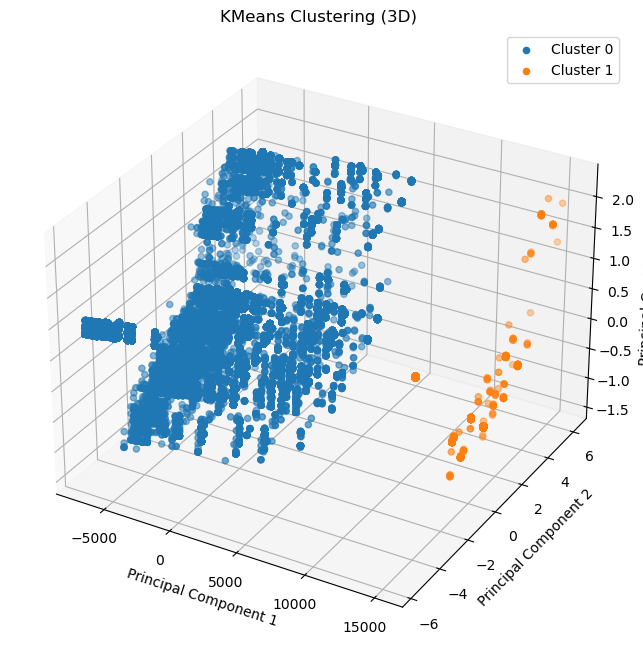

In [117]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

n_clusters = 2

# Applying PCA to reduce data to 3 dimensions
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(ohe)

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    ax.scatter(reduced_data[mbkm_clusters == i, 0], reduced_data[mbkm_clusters == i, 1], 
               reduced_data[mbkm_clusters == i, 2], label=f'Cluster {i}')

ax.set_title('KMeans Clustering (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


In [118]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


# Calculate the silhouette score (ranges from -1 to 1, higher is better)
silhouette_avg = silhouette_score(ohe, mbkm_clusters)
print("Silhouette Score:", silhouette_avg)

# Calculate the Davies-Bouldin index (lower is better)
davies_bouldin_avg = davies_bouldin_score(ohe, mbkm_clusters)
print("Davies-Bouldin Index:", davies_bouldin_avg)

# Calculate the Calinski ()
calinski_harabasz_score_avg = calinski_harabasz_score(ohe, mbkm_clusters)
print("Calinski Score:", calinski_harabasz_score_avg)



Silhouette Score: 0.803723781830307
Davies-Bouldin Index: 0.17192036287384005
Calinski Score: 276843.5961409916


# Fuzzy CMeans

In [26]:
# !pip install scikit-fda

from skfda.ml.clustering import FuzzyCMeans
from skfda.representation.grid import FDataGrid

n_clusters = 2
fcm = FuzzyCMeans(n_clusters=n_clusters,fuzzifier=2)
fcm.fit(FDataGrid(ohe))

FuzzyCMeans()

In [28]:
fcm.labels_

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
pd.DataFrame(fcm.membership_degree_)

,0,1
0,0.002283,0.997717
1,0.999625,0.000375
2,0.984360,0.015640
3,0.802654,0.197346
4,0.980519,0.019481
...,...,...
61693,0.002283,0.997717
61694,0.989795,0.010205
61695,0.984360,0.015640
61696,0.002283,0.997717


In [46]:
data_grid = FDataGrid(ohe)
fcm.predict(data_grid)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [54]:
from skfda.ml.clustering import FuzzyCMeans
from skfda.representation.grid import FDataGrid
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# Assuming 'ohe' is your original data
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(ohe)

# Fit Fuzzy C-Means on reduced data
fcm.fit(FDataGrid(reduced_data))

# Get predicted labels
predicted_labels = fcm.predict(FDataGrid(reduced_data))

# Perform clustering evaluation metrics on reduced data
silhouette_avg = silhouette_score(reduced_data, predicted_labels)
db_index = davies_bouldin_score(reduced_data, predicted_labels)
ch_index = calinski_harabasz_score(reduced_data, predicted_labels)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)


Silhouette Score: 0.6106637114723162
Davies-Bouldin Index: 0.6328850872902158
Calinski-Harabasz Index: 110836.50324609427


# OPTICS

In [34]:
# from sklearn.cluster import OPTICS

# n_clusters = 2
# opt = OPTICS(min_samples=50)
# clusters = opt.fit(ohe)

# print(clusters)


# Bisecting K-Means


In [7]:
from sklearn.cluster import BisectingKMeans

#Build and fit model:
bisect_means = BisectingKMeans(n_clusters=2).fit(ohe)
BKM_labels = bisect_means.labels_
BKM_labels

array([1, 0, 0, ..., 0, 1, 0])

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Calculate the silhouette score (ranges from -1 to 1, higher is better)
silhouette_avg = silhouette_score(ohe, BKM_labels)
print("Silhouette Score:", silhouette_avg)

# Calculate the Davies-Bouldin index (lower is better)
davies_bouldin_avg = davies_bouldin_score(ohe, BKM_labels)
print("Davies-Bouldin Index:", davies_bouldin_avg)

# Calculate the Calinski ()
calinski_harabasz_score_avg = calinski_harabasz_score(ohe, BKM_labels)
print("Calinski Score:", calinski_harabasz_score_avg)



Silhouette Score: 0.803723781830307
Davies-Bouldin Index: 0.17192036287384005
Calinski Score: 276843.5961409916
